In [14]:
# prompt: read cvs file
import pandas as pd
import numpy as np
import tensorflow as tf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Ecommerce_Customers.csv')
# Print the DataFrame
print(df)

                             Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ...               ...   
495  4483 J

In [5]:
# Select the relevant columns
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

# Add a constant term to the design matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                         10:52:31   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [6]:

# Print the coefficient of the 'Time on Website' variable
print(model.params['Time on Website'])


0.43673883559425164


In [9]:
# prompt: now test the model

# Make predictions using the model
predictions = model.predict(X)

# Print the first 5 predictions
print(predictions[:5])

# Calculate the model's mean squared error
mse = mean_squared_error(y, predictions)

# Print the model's mean squared error
print(mse)


0    594.739288
1    380.363805
2    505.200132
3    570.397454
4    591.622710
dtype: float64
98.47102522148998


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display the coefficients
print("Coefficients:")
print(model.coef_)
print("Intercept:")
print(model.intercept_)

Mean Squared Error: 109.8637411839391
R-squared: 0.9778130629184129
Coefficients:
[ 0.         25.5962591  38.78534598  0.31038593 61.89682859]
Intercept:
-1044.2574146365591


Epoch 1/100
10/10 [==============================] - 3s 58ms/step - loss: 258042.9219 - val_loss: 259533.1562
Epoch 2/100
10/10 [==============================] - 0s 15ms/step - loss: 257652.2812 - val_loss: 259123.1562
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 257182.2812 - val_loss: 258564.6250
Epoch 4/100
10/10 [==============================] - 0s 16ms/step - loss: 256500.5938 - val_loss: 257716.5000
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 255443.3750 - val_loss: 256394.2500
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 253814.6719 - val_loss: 254344.7031
Epoch 7/100
10/10 [==============================] - 0s 16ms/step - loss: 251315.4062 - val_loss: 251228.2500
Epoch 8/100
10/10 [==============================] - 0s 20ms/step - loss: 247530.9688 - val_loss: 246683.4688
Epoch 9/100
10/10 [==============================] - 0s 17ms/step - loss: 242165.2188 - val_loss: 240220.4219
Epoch 10/1

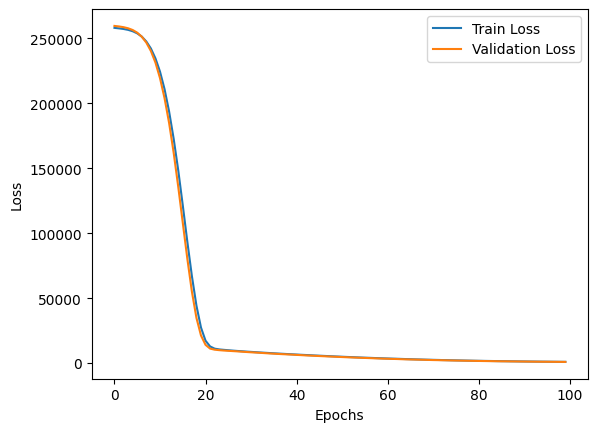

In [16]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optional: Convert y_test and y_pred to 1D arrays for better readability
y_test_1d = y_test.values.flatten()
y_pred_1d = y_pred.flatten()

# Display first 10 actual vs predicted values
print("First 10 Actual vs Predicted values:")
for actual, predicted in zip(y_test_1d[:10], y_pred_1d[:10]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Plotting the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
